In [69]:
pip install uv



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [70]:
uv pip install pandas numpy matplotlib seaborn scikit-learn

Using Python 3.11.5 environment at: env
Audited 5 packages in 15ms
Note: you may need to restart the kernel to use updated packages.


In [71]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import gc

In [72]:
df = pd.read_csv('data/titanic_cleaned.csv')
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [73]:
df.shape
df.info()
df.describe()
df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  embarked     891 non-null    object 
 11  title        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


passengerid    891
survived       891
pclass         891
name           891
sex            891
age            891
sibsp          891
parch          891
ticket         891
fare           891
embarked       891
title          891
dtype: int64

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


Chi2: 102.88898875696056, p-value: 4.549251711298793e-23


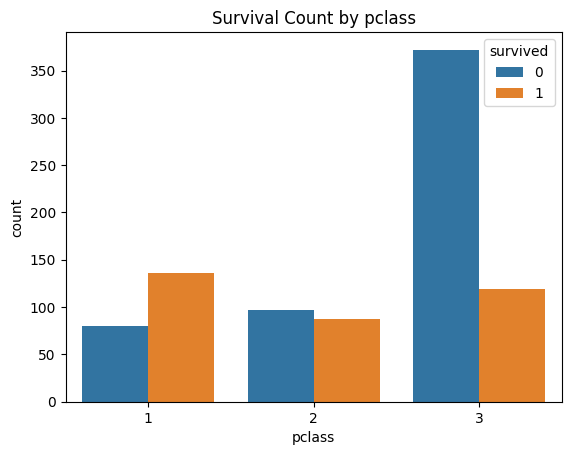

survived,0,1
sex,,
female,81,233
male,468,109


Chi2: 260.71702016732104, p-value: 1.197357062775565e-58


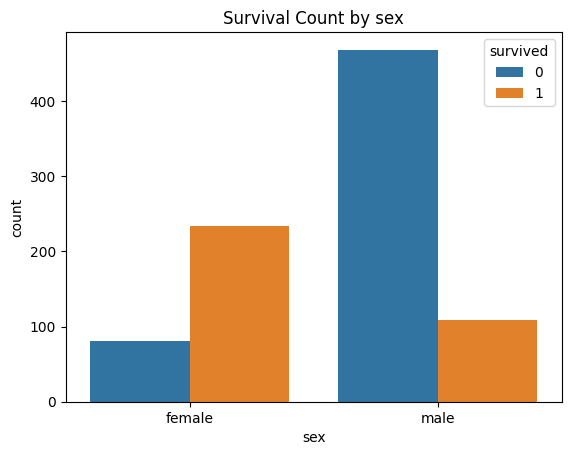

survived,0,1
embarked,,
C,75,93
Q,47,30
S,427,219


Chi2: 25.964452881874784, p-value: 2.3008626481449577e-06


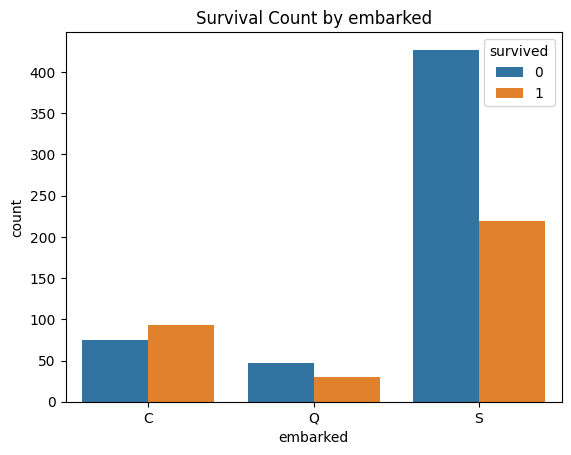

survived,0,1
title,,
Master,17,23
Miss,55,129
Mr,437,82
Mrs,26,103
Officer,14,5


Chi2: 291.3420130772467, p-value: 7.984173381155626e-62


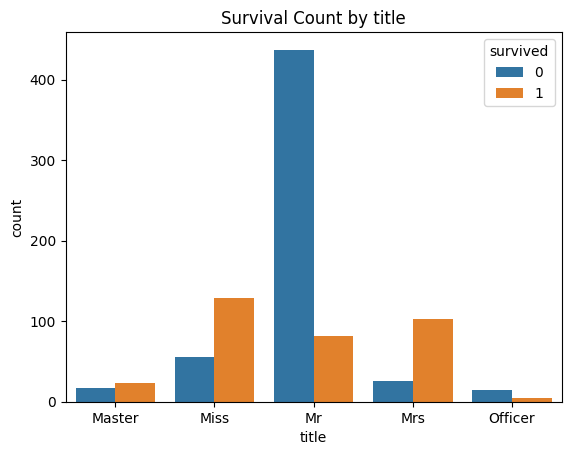

survived,0,1
ticket,,
110152,0,3
110413,1,2
110465,2,0
110564,0,1
110813,0,1
...,...,...
W./C. 6608,4,0
W./C. 6609,1,0
W.E.P. 5734,1,0


Chi2: 766.5697029458893, p-value: 0.011527296011637753


In [74]:
from scipy.stats import chi2_contingency

# Perform Chi-Squared Test for Categorical Features
for feat in ["pclass", "sex", "embarked", "title", "ticket"]:
    df[feat] = df[feat].astype("category")
    contingency_table = pd.crosstab(df[feat], df["survived"])
    display(pd.DataFrame(contingency_table))
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi2: {chi2}, p-value: {p}")
    if feat != "ticket":
        sns.countplot(data=df, x=feat, hue="survived")
        plt.title(f"Survival Count by {feat}")
        plt.show()

In [75]:
X = df [["sex","age", "fare", "pclass","sibsp","parch","embarked","title"]]
y = df ["survived"]

print ("X: ", X.shape)
print ("y: ", y.shape)


X:  (891, 8)
y:  (891,)


In [76]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [77]:
numerical_cols = X.select_dtypes(include = ["int64","float64"]).columns
print (numerical_cols)
categorical_cols = X.select_dtypes(include = ["category"]).columns
print (categorical_cols)


Index(['age', 'fare', 'sibsp', 'parch'], dtype='object')
Index(['sex', 'pclass', 'embarked', 'title'], dtype='object')


In [78]:
categorical_pipeline = Pipeline ( 
    [
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("encoder",OneHotEncoder(drop = "first", handle_unknown="ignore"))
    ]

)

In [79]:
numerical_pipeline = Pipeline ( 
    [
        ("imputer",SimpleImputer(strategy="mean")),
        # ("scaler",StandardScaler())
    ]
)

In [80]:
preprocessor = ColumnTransformer (
    transformers = [
        ("num",numerical_pipeline, numerical_cols),
        ("cat",categorical_pipeline, categorical_cols),
    ]
)

In [81]:
model_pipeline = Pipeline (
    steps = [
        ("preprocessing",preprocessor),
        ("classifier", RandomForestClassifier(random_state=42)),
        # ("classification",LogisticRegression(random_state = 42))
    ]
    
)
model_pipeline


,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [82]:
#Split data into features and target variable 
X_train, X_test, y_train, y_test = train_test_split (
    X,
    y,
    test_size = 0.2,
    random_state = 42, 
    stratify = y

)
print (X_train.shape,X_test.shape,y_train.shape, y_test.shape)
gc.collect()

(712, 8) (179, 8) (712,) (179,)


6943

In [83]:
model = model_pipeline.named_steps["classifier"]
model

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h1> Applying preprocessing steps and fitting the model </h1>

In [84]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [85]:
encoded_columns = (
    model_pipeline[0].transformers_[1][1].named_steps["encoder"].get_feature_names_out(categorical_cols)
)

In [86]:
# Combine the numerical and encoded categorical columns

all_columns = list (numerical_cols) + list (encoded_columns)

In [87]:
#convert into dataframe

X_train_df = pd.DataFrame(X_train_processed,columns = all_columns)
X_test_df = pd.DataFrame(X_test_processed,columns = all_columns)

X_train_df.head(5)

,age,fare,sibsp,parch,sex_male,pclass_2,pclass_3,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_Officer
0,32.0,56.4958,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,32.0,0.0000,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,32.0,221.7792,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,18.0,9.3500,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,31.0,26.2500,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [88]:
model.fit(X_train_df,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [104]:
y_pred = model_pipeline.predict(X_test)
model.score (X_test_df,y_test)
# model_pipeline.score (X_test,y_test)
# print (y_pred[:10])

/Users/aarohan/college_stuff/data200/Application/env/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8268156424581006

In [108]:
pip install streamlit


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [109]:
# Saving the model 

import pickle

#Save the pipeline to a file 

with open ("models/model_pipeline.pkl","wb") as f:
    pickle.dump (model_pipeline,f)